In [1]:
import os
import sys
sys.path.insert(0, "../../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.text.epu import EPU

In [2]:
parent_dirs = sys.path[0] + "data/text/"
country_dirs = [
    parent_dirs + country for country in os.listdir(parent_dirs)
    if country != ".DS_Store" and "marshall_islands" not in country
    and "tonga" not in country
]
output_dir = sys.path[0] + "outputs/text/"

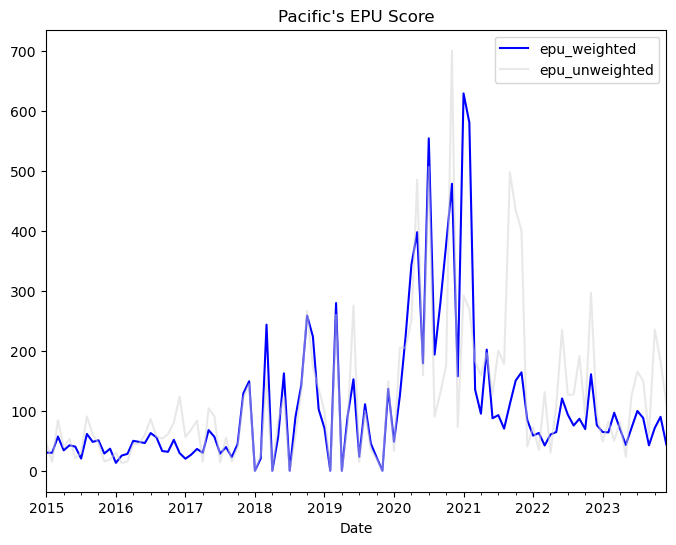

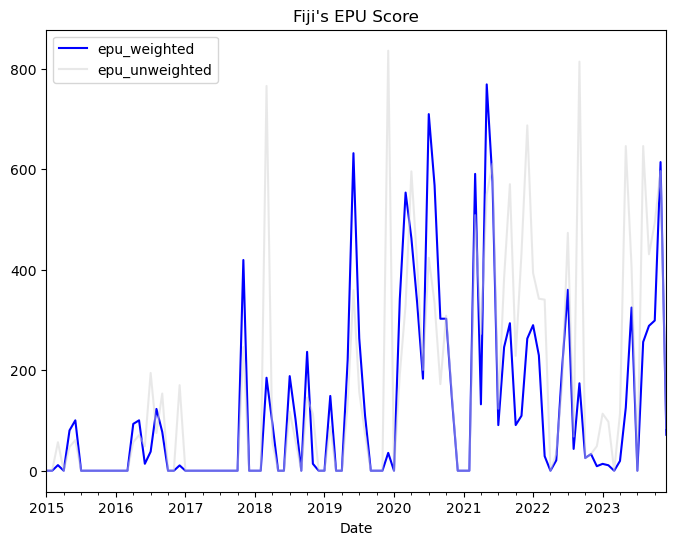

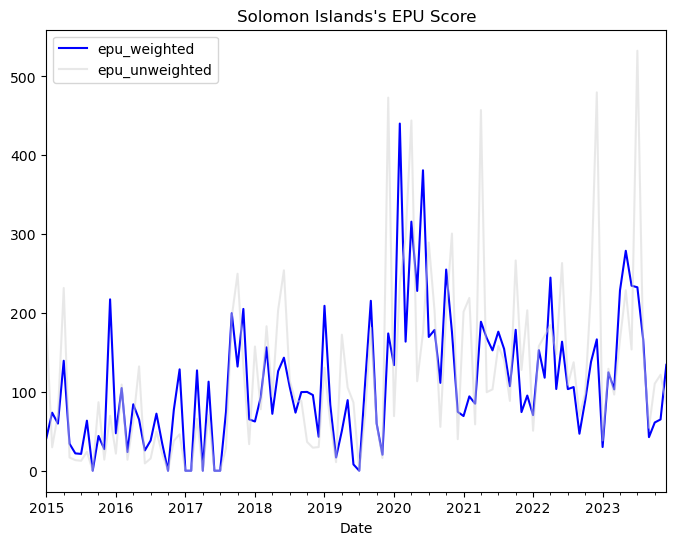

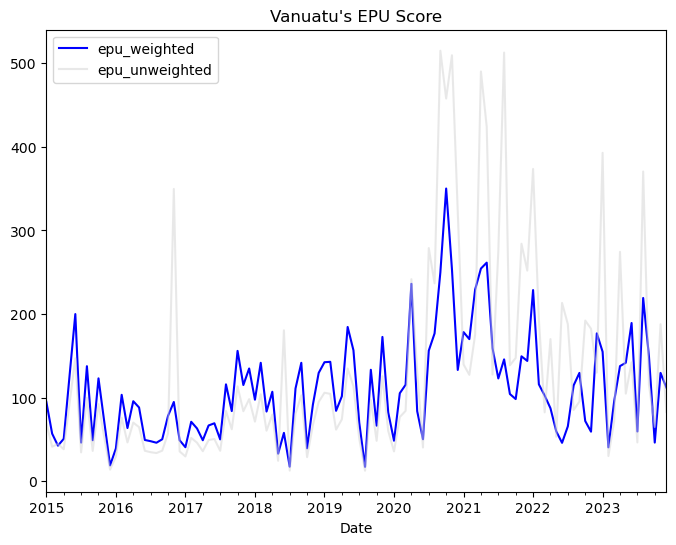

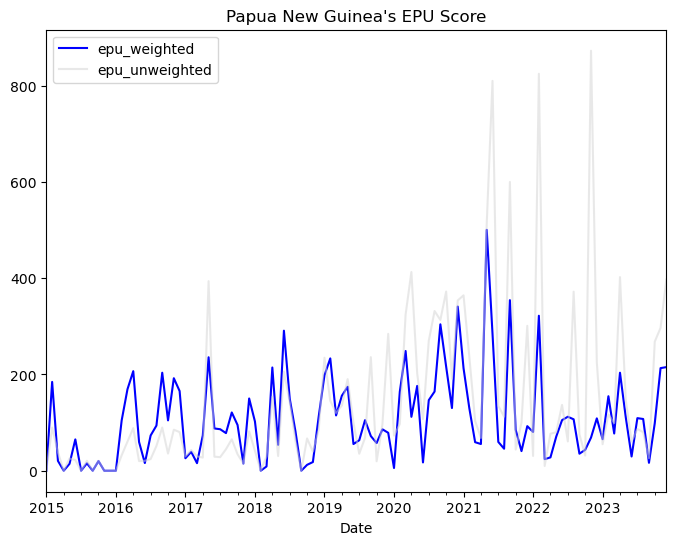

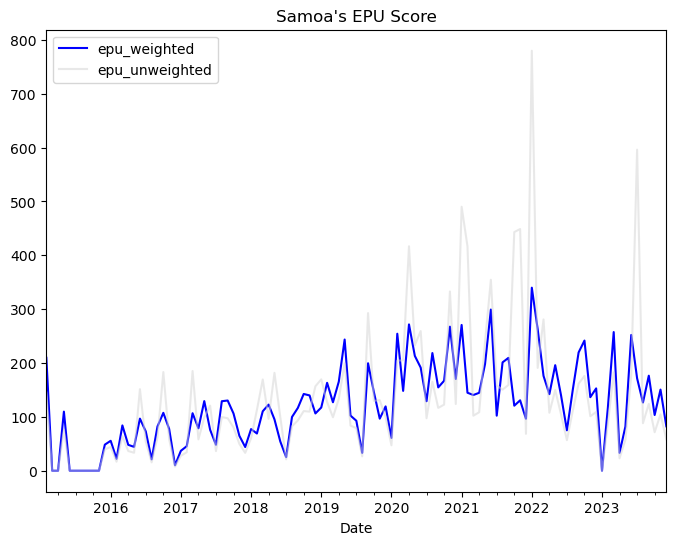

In [3]:
for country in country_dirs:
    country_name = country.split("/")[-1]
    news_dirs = [
        f"{country}/{file}" for file in os.listdir(country) if "news" in file
        and "ner" not in file
    ]
    
    ner_files = [f"{country}/{file}" for file in os.listdir(country) if "ner" in file]

    excl_urls = []
    for ner_file in ner_files:
        ner_df = pd.read_csv(ner_file)
        for url, ner in zip(ner_df["url"], ner_df["ner"]):
            if "risk" in str(ner).lower():
                excl_urls.append(url)
    
    e = EPU(news_dirs, cutoff="2020-12-31", non_epu_urls=excl_urls)
    e.get_epu_category(subset_condition="date >= '2015-01-01' and date < '2024-01-01'")
    e.get_count_stats()
    e.calculate_epu_score()
    
    epu_stats = e.epu_stats
    fig, ax = plt.subplots(figsize=(8, 6))
    epu_stats.plot(x="date", y="epu_weighted", color="blue", ax=ax)
    epu_stats.plot(x='date', y="epu_unweighted", color="lightgray", alpha=0.5, ax=ax)
    
    title = " ".join(n[0].upper() + n[1:] for n in country_name.split("_"))
    ax.set_title(f"{title}'s EPU Score")
    ax.set_xlabel("Date")
    
    saved_folder = output_dir + f"{country_name}/epu/"
    
    epu_stats.to_csv(saved_folder + f"{country_name}_epu.csv", encoding="utf-8")